# Recommendation System Using Sentiment Analysis

# Loading the Dataset

In [39]:
import pandas as pd
df=pd.read_csv('cloths-rating.csv')
df

,ProductID,UserID,Rating,Text
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl..."
...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m..."
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great


<AxesSubplot:>

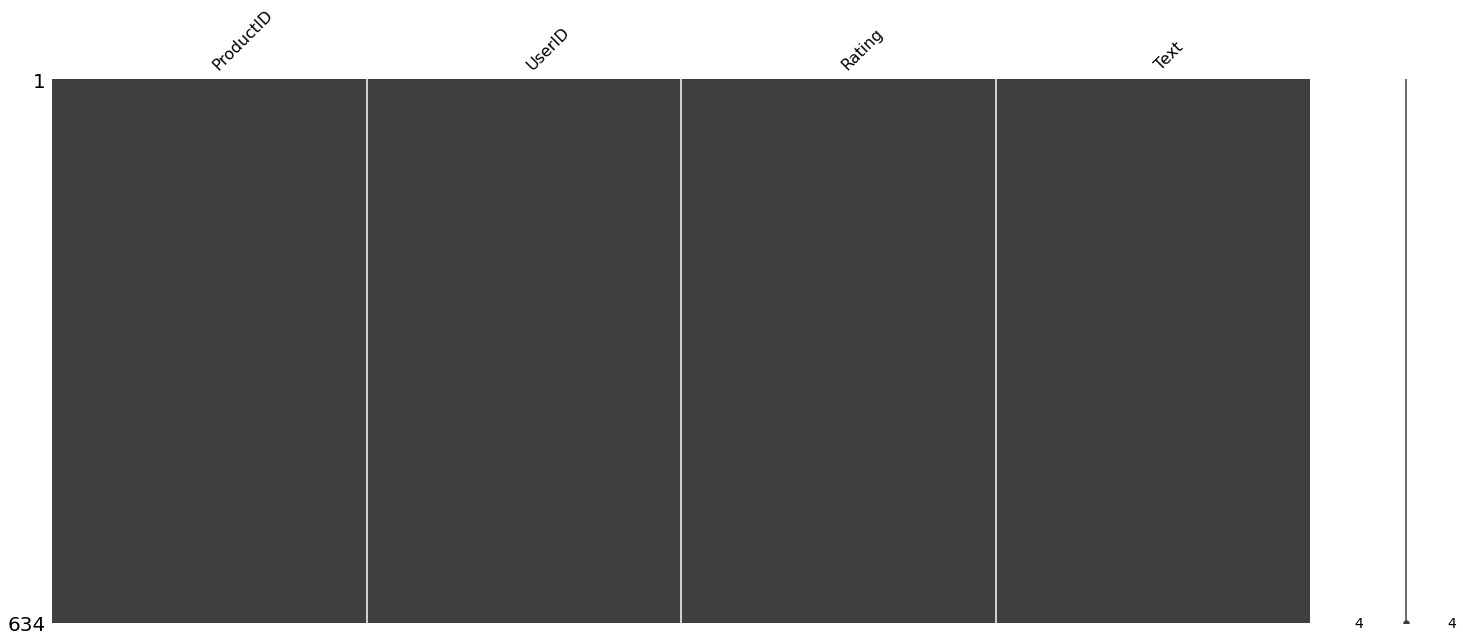

In [40]:
import missingno as msno
msno.matrix(df)

We can clearly see that there are no missing values in the dataset.

# Removing Punctuations

In [3]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
#removing Emojis and symbols
import re
def deEmojify(i):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub( '',i)
    
#removing punctuation
remPunc=[]
def remove_punct(i):
    df.Text= df.Text.str.lower()
    text_clear="".join([char for char in i if char not in string.punctuation ])
    remPunc.append(text_clear)
txt=df.Text.to_list()



#function call punctuation removing
i=1
for i in txt :
    remove_punct(i)

    
#function call Emojis removing
deEmojified=[]
for i in remPunc:
    EmjRe = deEmojify(i)
    deEmojified.append(EmjRe)
#print(deEmojified)
    
    

# Tokenization

In [7]:
import nltk

In [8]:
tokens=[]
from nltk.tokenize import word_tokenize
for i in deEmojified:
    tokens.append(word_tokenize(i))
#print(tokens)    



# Removing StopWords

In [9]:
#>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.remove('but')
stopwords.remove('not')
stopwords.remove('too')
#print(stopwords)

def remStpWrd(i):
    str = [char for char in i if  char.lower() not in stopwords]
    remStpwrd.append(str)
    
    
#function call stop words removal    
remStpwrd = []    
for i in tokens:
    remStpWrd(i)
#print(remStpwrd)



# Lemmatization

In [15]:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
lemmatized = []
lemmatizein = []
for i in remStpwrd:
    for j in i:
        lemmatizing = lemmatizer.lemmatize(j)
        lemmatizein.append(lemmatizing)
    lemmatized.append(lemmatizein)
    lemmatizein = []
    
#print(lemmatized)

In [16]:
clean = []
for i in lemmatized:
    i = " ".join(i)
    clean.append(i)
#print(clean)

df['CleanedText'] = clean
df


,ProductID,UserID,Rating,Text,CleanedText
0,777,AV1YnR7wglJLPUi8IJmi,4,great taffy at a great price.,great taffy great price
1,767,AVpfpK8KLJeJML43BCuD,4,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
2,1080,AVqkIdntQMlgsOJE6fuB,5,love this dress! it's sooo pretty.,love dress sooo pretty
3,1077,AVpfpK8KLJeJML43BCuD,3,i had such high hopes for this dress and reall...,high hope dress really wanted work
4,1049,AVpfpK8KLJeJML43BCuD,5,"i love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
...,...,...,...,...,...
629,823,B08GWV3SM6,1,i placed order 4+1 soaps.but i have received w...,placed order 41 soapsbut received without seal...
630,823,B08GWV3SM6,3,"the soap is ok for bathing, no scent at all, m...",soap ok bathing scent drier green one cinthol ...
631,847,B08GWV3SM6,5,for a long time i was searching for indian soa...,long time searching indian soap equal usa ivor...
632,910,AVph0EeEilAPnD_x9myq,3,good but not great,good but not great


# Finding sentiment on Text(Reviews)

In [17]:
#!pip install textblob
from textblob import TextBlob

In [18]:
def sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return false
df['sentiment'] = df ['CleanedText'].apply(sentiment)
df

,ProductID,UserID,Rating,Text,CleanedText,sentiment
0,777,AV1YnR7wglJLPUi8IJmi,4,great taffy at a great price.,great taffy great price,0.800000
1,767,AVpfpK8KLJeJML43BCuD,4,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333
2,1080,AVqkIdntQMlgsOJE6fuB,5,love this dress! it's sooo pretty.,love dress sooo pretty,0.375000
3,1077,AVpfpK8KLJeJML43BCuD,3,i had such high hopes for this dress and reall...,high hope dress really wanted work,0.180000
4,1049,AVpfpK8KLJeJML43BCuD,5,"i love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,0.500000
...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,i placed order 4+1 soaps.but i have received w...,placed order 41 soapsbut received without seal...,0.000000
630,823,B08GWV3SM6,3,"the soap is ok for bathing, no scent at all, m...",soap ok bathing scent drier green one cinthol ...,0.266667
631,847,B08GWV3SM6,5,for a long time i was searching for indian soa...,long time searching indian soap equal usa ivor...,-0.025000
632,910,AVph0EeEilAPnD_x9myq,3,good but not great,good but not great,0.150000


In [19]:
df['rated_sentiment']=df['Rating']*df['sentiment']
df


,ProductID,UserID,Rating,Text,CleanedText,sentiment,rated_sentiment
0,777,AV1YnR7wglJLPUi8IJmi,4,great taffy at a great price.,great taffy great price,0.800000,3.200000
1,767,AVpfpK8KLJeJML43BCuD,4,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333,2.533333
2,1080,AVqkIdntQMlgsOJE6fuB,5,love this dress! it's sooo pretty.,love dress sooo pretty,0.375000,1.875000
3,1077,AVpfpK8KLJeJML43BCuD,3,i had such high hopes for this dress and reall...,high hope dress really wanted work,0.180000,0.540000
4,1049,AVpfpK8KLJeJML43BCuD,5,"i love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,0.500000,2.500000
...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,i placed order 4+1 soaps.but i have received w...,placed order 41 soapsbut received without seal...,0.000000,0.000000
630,823,B08GWV3SM6,3,"the soap is ok for bathing, no scent at all, m...",soap ok bathing scent drier green one cinthol ...,0.266667,0.800000
631,847,B08GWV3SM6,5,for a long time i was searching for indian soa...,long time searching indian soap equal usa ivor...,-0.025000,-0.125000
632,910,AVph0EeEilAPnD_x9myq,3,good but not great,good but not great,0.150000,0.450000


# Classifying the rated Sentiment and generating new Score

In [20]:

list=[]
sentiment=[-1,-.75,-.50,-.25,0,.25,.50,.75,1]
for i in range(1,6):                      #we have rating 1 to 5
    for j in sentiment:
        new=i*j
        list.append(new)
print(list)
len(list)

[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, -2, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2, -3, -2.25, -1.5, -0.75, 0, 0.75, 1.5, 2.25, 3, -4, -3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0, 4, -5, -3.75, -2.5, -1.25, 0, 1.25, 2.5, 3.75, 5]


45

In [21]:
import numpy as np
x = np.array(list)
Unique=np.unique(x)
print(Unique)
len(Unique)

[-5.   -4.   -3.75 -3.   -2.5  -2.25 -2.   -1.5  -1.25 -1.   -0.75 -0.5
 -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   2.    2.25  2.5   3.
  3.75  4.    5.  ]


27

In [22]:
def newscr(a):
    if a <0 or a==0:
        return 1
    elif a>0 and a<=2:
        return 2
    elif a>2 and a<=3:
        return 3
    elif a>3 and a<=4:
        return 4
    elif a>4 and a<=5:
        return 5
      
df['newScore'] = df['rated_sentiment'].apply(newscr)
df

,ProductID,UserID,Rating,Text,CleanedText,sentiment,rated_sentiment,newScore
0,777,AV1YnR7wglJLPUi8IJmi,4,great taffy at a great price.,great taffy great price,0.800000,3.200000,4
1,767,AVpfpK8KLJeJML43BCuD,4,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333,2.533333,3
2,1080,AVqkIdntQMlgsOJE6fuB,5,love this dress! it's sooo pretty.,love dress sooo pretty,0.375000,1.875000,2
3,1077,AVpfpK8KLJeJML43BCuD,3,i had such high hopes for this dress and reall...,high hope dress really wanted work,0.180000,0.540000,2
4,1049,AVpfpK8KLJeJML43BCuD,5,"i love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,0.500000,2.500000,3
...,...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,i placed order 4+1 soaps.but i have received w...,placed order 41 soapsbut received without seal...,0.000000,0.000000,1
630,823,B08GWV3SM6,3,"the soap is ok for bathing, no scent at all, m...",soap ok bathing scent drier green one cinthol ...,0.266667,0.800000,2
631,847,B08GWV3SM6,5,for a long time i was searching for indian soa...,long time searching indian soap equal usa ivor...,-0.025000,-0.125000,1
632,910,AVph0EeEilAPnD_x9myq,3,good but not great,good but not great,0.150000,0.450000,2


In [ ]:
#!pip install scikit-learn

# Label Encoding  of UserID

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['UserID'] = le.fit_transform(df['UserID'])

df

,ProductID,UserID,Rating,Text,CleanedText,sentiment,rated_sentiment,newScore
0,777,0,4,great taffy at a great price.,great taffy great price,0.800000,3.200000,4
1,767,3,4,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.633333,2.533333,3
2,1080,13,5,love this dress! it's sooo pretty.,love dress sooo pretty,0.375000,1.875000,2
3,1077,3,3,i had such high hopes for this dress and reall...,high hope dress really wanted work,0.180000,0.540000,2
4,1049,3,5,"i love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,0.500000,2.500000,3
...,...,...,...,...,...,...,...,...
629,823,41,1,i placed order 4+1 soaps.but i have received w...,placed order 41 soapsbut received without seal...,0.000000,0.000000,1
630,823,41,3,"the soap is ok for bathing, no scent at all, m...",soap ok bathing scent drier green one cinthol ...,0.266667,0.800000,2
631,847,41,5,for a long time i was searching for indian soa...,long time searching indian soap equal usa ivor...,-0.025000,-0.125000,1
632,910,7,3,good but not great,good but not great,0.150000,0.450000,2


# Pivot table of ProductID, UserID and New_score

In [25]:
df_pivot=df.pivot_table(index='ProductID',columns='UserID', values='newScore').fillna(0)
df_pivot

UserID,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
ProductID,,,,,,,,,,,,,,,,,,,,,
89,0.0,0.000000,0.000000,2.0,0.0,0.0,4.00,1.000000,2.0,0.0,...,0.000000,2.00,0.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,2.75
333,0.0,1.500000,0.000000,0.0,0.0,3.0,0.00,0.000000,4.0,1.0,...,0.000000,1.00,3.0,0.0,0.000000,1.750000,0.000000,0.000000,0.000000,0.00
369,4.0,1.000000,0.000000,2.0,0.0,5.0,4.00,3.000000,0.0,0.0,...,0.000000,0.00,0.0,0.0,0.000000,0.000000,1.333333,0.000000,4.000000,0.00
444,2.0,5.000000,0.000000,0.0,1.0,0.0,3.00,5.000000,2.0,0.0,...,2.000000,0.00,2.5,0.0,0.000000,1.666667,0.000000,0.000000,2.666667,0.00
684,0.0,0.000000,3.000000,3.0,2.0,0.0,1.00,2.000000,2.0,0.0,...,2.500000,0.00,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.50
697,0.0,1.000000,2.000000,0.0,0.0,0.0,4.00,0.000000,1.0,2.0,...,3.000000,2.00,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.50
767,2.0,0.000000,0.000000,3.0,0.0,0.0,1.00,0.000000,0.0,0.0,...,0.000000,1.00,0.0,0.0,2.000000,0.000000,1.000000,1.000000,0.000000,0.00
777,4.0,0.000000,0.000000,0.0,0.0,0.0,1.00,0.000000,0.0,2.0,...,0.000000,1.00,0.0,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,0.00
823,0.0,0.000000,0.000000,3.0,0.0,0.0,5.00,1.000000,0.0,0.0,...,0.000000,5.00,0.0,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,1.50


# Sparse Matrix (Compressed Sparse Row)

In [26]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values)
print(df_pivot_matrix)


  (0, 3)	2.0
  (0, 6)	4.0
  (0, 7)	1.0
  (0, 8)	2.0
  (0, 11)	3.0
  (0, 16)	2.5
  (0, 18)	3.0
  (0, 20)	1.0
  (0, 22)	4.0
  (0, 28)	3.0
  (0, 33)	2.0
  (0, 37)	3.0
  (0, 41)	2.75
  (1, 1)	1.5
  (1, 5)	3.0
  (1, 8)	4.0
  (1, 9)	1.0
  (1, 10)	2.0
  (1, 13)	2.0
  (1, 17)	1.25
  (1, 22)	3.0
  (1, 25)	1.25
  (1, 29)	2.0
  (1, 33)	1.0
  (1, 34)	3.0
  :	:
  (25, 17)	4.0
  (25, 21)	2.0
  (25, 22)	1.0
  (25, 25)	2.0
  (25, 30)	3.0
  (25, 38)	2.0
  (25, 40)	1.0
  (26, 0)	1.0
  (26, 1)	2.0
  (26, 3)	3.0
  (26, 6)	1.0
  (26, 7)	2.5
  (26, 8)	1.0
  (26, 9)	1.0
  (26, 11)	2.3333333333333335
  (26, 16)	2.0
  (26, 17)	1.6
  (26, 18)	2.3333333333333335
  (26, 19)	1.0
  (26, 22)	1.0
  (26, 23)	2.0
  (26, 25)	3.3333333333333335
  (26, 28)	2.0
  (26, 33)	2.75
  (26, 37)	1.75


# Matrix of cosine similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(df_pivot)
similarity_matrix


array([[1.        , 0.34414548, 0.30988781, 0.3579175 , 0.51053735,
        0.42961437, 0.2185533 , 0.29511929, 0.74511489, 0.28320834,
        0.12189114, 0.29523561, 0.47542679, 0.44916318, 0.25023056,
        0.06160594, 0.25938718, 0.08500383, 0.18405052, 0.0807146 ,
        0.38189834, 0.34754632, 0.08220642, 0.        , 0.51375825,
        0.12954445, 0.65120005],
       [0.34414548, 1.        , 0.41470441, 0.32357486, 0.26264707,
        0.43276159, 0.19834277, 0.04869607, 0.2871912 , 0.27771392,
        0.12402777, 0.20953809, 0.47524553, 0.50015606, 0.42537139,
        0.22363592, 0.17620627, 0.07714317, 0.37942755, 0.        ,
        0.22646458, 0.1547832 , 0.217326  , 0.        , 0.39606088,
        0.31350649, 0.33376953],
       [0.30988781, 0.41470441, 1.        , 0.41763366, 0.17492708,
        0.32212396, 0.4837851 , 0.37932571, 0.36396241, 0.36443223,
        0.14100332, 0.20228948, 0.27028443, 0.24778843, 0.20910678,
        0.31356851, 0.06176639, 0.31247783, 0.2775

# Model Building

In [28]:
from sklearn.neighbors import NearestNeighbors                   #model fitting

model_knn = NearestNeighbors(metric='cosine' , n_neighbors=20 , radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=20, radius=1)

In [29]:
product_ID = int(input("Enter the product Id: "))
data = df_pivot.index.to_list()
data

Enter the product Id: 777


[89,
 333,
 369,
 444,
 684,
 697,
 767,
 777,
 823,
 847,
 853,
 858,
 862,
 910,
 949,
 1002,
 1003,
 1049,
 1060,
 1065,
 1077,
 1080,
 1095,
 1120,
 6969,
 8001,
 9696]

In [30]:
query_index = data.index(product_ID)
print(query_index)

7


In [31]:
similarity , indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors =  8)
similarity=np.round(similarity,2)
print(similarity)
print(indices)


[[0.   0.6  0.62 0.62 0.64 0.66 0.66 0.68]]
[[ 7  6 21  2 26 20 15  3]]


In [32]:
i=df_pivot.index[indices.flatten()]
i

Index([777, 767, 1080, 369, 9696, 1077, 1002, 444], dtype='int64', name='ProductID')

In [33]:
d=similarity.flatten()
d

array([0.  , 0.6 , 0.62, 0.62, 0.64, 0.66, 0.66, 0.68])

In [34]:
new=(zip(i,d))
new

In [35]:
pd.DataFrame(new)

,0,1
0,777,0.00
1,767,0.60
2,1080,0.62
3,369,0.62
4,9696,0.64
5,1077,0.66
6,1002,0.66
7,444,0.68


# Create dictionary and store recommendations of productID which is given by USER

In [36]:
data_dict={}
for i in range(0, len(similarity.flatten())):   

    if i==0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        data_dict[str(df_pivot.index[indices.flatten()[i]])] = float(similarity.flatten()[i])
        print(f'{df_pivot.index[indices.flatten()[i]]},similarity distance is equal to {similarity.flatten()[i]}')

print("\n", data_dict)

Recommendations for 777:

767,similarity distance is equal to 0.6
1080,similarity distance is equal to 0.62
369,similarity distance is equal to 0.62
9696,similarity distance is equal to 0.64
1077,similarity distance is equal to 0.66
1002,similarity distance is equal to 0.66
444,similarity distance is equal to 0.68

 {'767': 0.6, '1080': 0.62, '369': 0.62, '9696': 0.64, '1077': 0.66, '1002': 0.66, '444': 0.68}
